ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:


Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order


X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


**Goal(s):
Predict if a customer is happy or not based on the answers they give to questions asked.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 15

In [2]:
df=pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
df.describe()

#X1 = More people agree that their order was delivered on time. (Mean = 4.33, Median = 5)
#X2 = People felt that the contents of their order was not as they expected. (Mean = 2.53, Median = 3)
#X3 = People were neautral about ordering everything they wanted to order. (Mean = 3.30, Median = 3)
#X4 = People somewhat agreed that they paid a good price for their order (Mean = 3.75, Medain = 4)
#X5 = People somewhat agreed that they were satisfied with their order (Mean = 3.65, Median = 4)
#X6 = People somewhat agreed that the app makes ordering easy (Mean = 4.25, Median = 4)

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.Y.value_counts(normalize = True) #Somewhat Balanced

1    0.547619
0    0.452381
Name: Y, dtype: float64

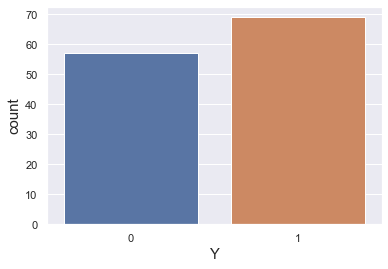

In [6]:
sns.countplot(x = 'Y', data = df);
#Roughly Balanced

In [7]:
df.columns[1:]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

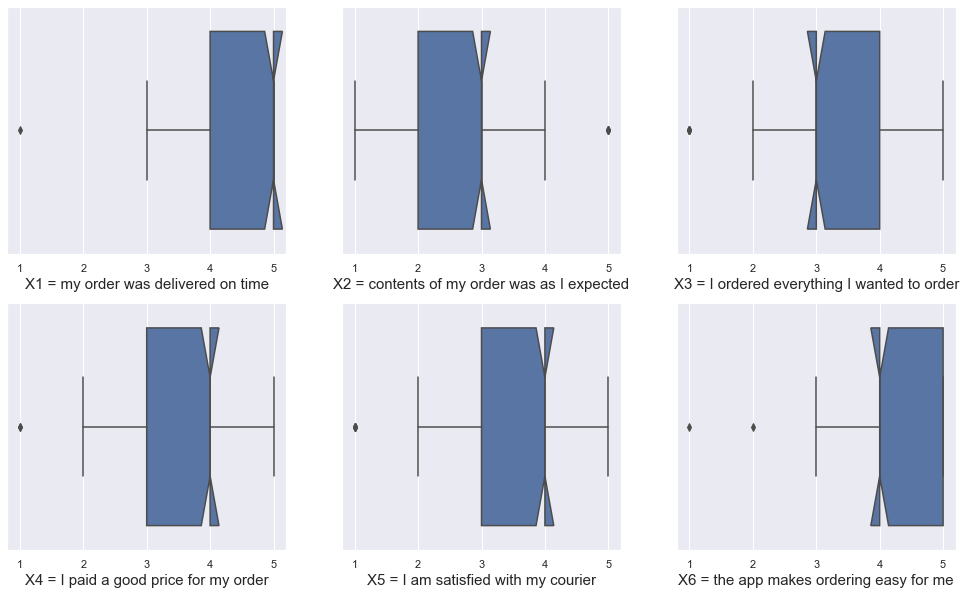

In [8]:
axis_names = ['X1 = my order was delivered on time', 'X2 = contents of my order was as I expected', 
              'X3 = I ordered everything I wanted to order', 'X4 = I paid a good price for my order',
              'X5 = I am satisfied with my courier', 'X6 = the app makes ordering easy for me']

fig, axes = plt.subplots(2,3, figsize=(17, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    sns.boxplot(x = col, data = df, ax = ax, notch=True) 
    ax.set(xlabel=name);

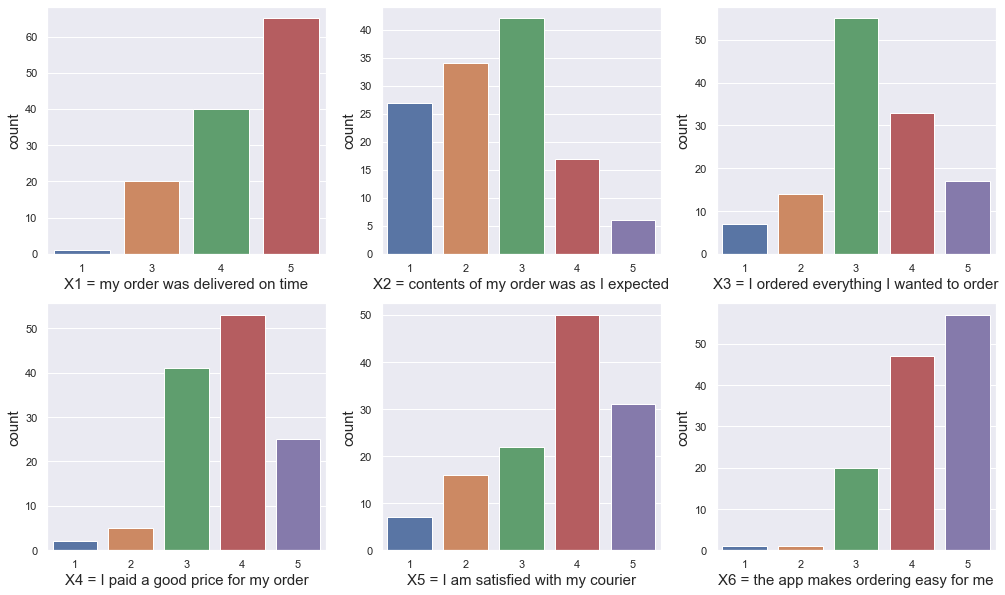

In [9]:
fig, axes = plt.subplots(2,3, figsize=(17, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    sns.countplot(x = col, data = df, ax = ax)
    ax.set(xlabel=name);

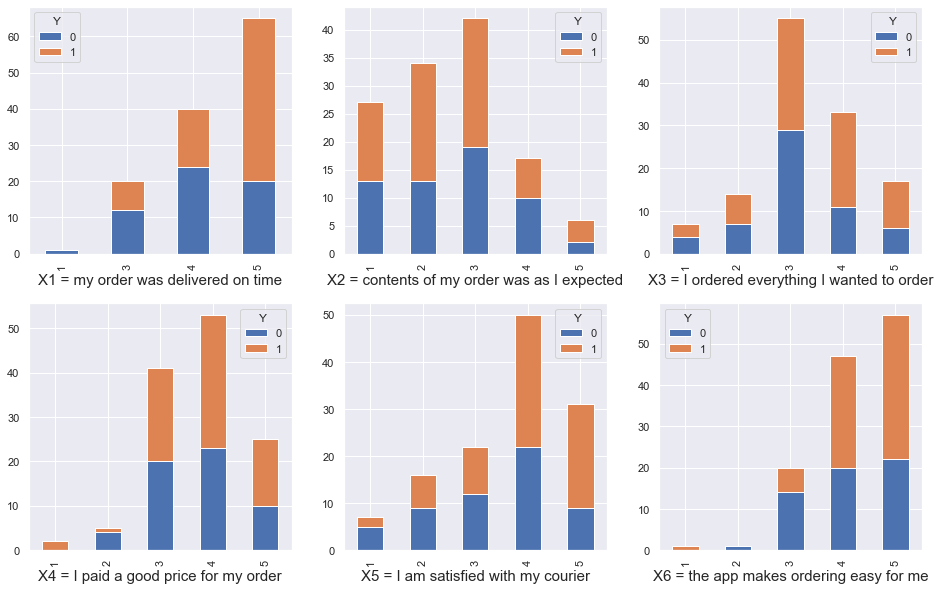

In [10]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    pd.crosstab(index = df[col], columns = df['Y']).plot(kind = 'bar', stacked = True, ax = ax)
    ax.set(xlabel=name);

X1, X3, X5 and X6 shows a clear pattern where customers who replied above 3 are generally more satisfied with the service compared to those who gave a score below 3.

X2 and X4 are not quite discernable whether the customers are happy or unhappy with the service.

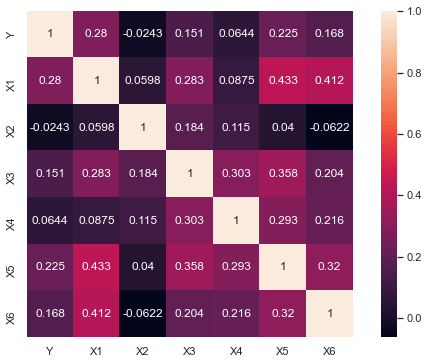

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt='.3g', square  = True);

#X1, X3, X5 and X6 have low but significant correlation with the dependent variable.

In [13]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [14]:
#Categorizing features in order where 1 is the lowest and 5 is the highest.

for col in df.columns[1:]:
    print(df[col].unique())
    print()

[3 5 4 1]

[3 2 4 5 1]

[3 2 4 5 1]

[4 5 3 2 1]

[2 4 3 5 1]

[4 3 5 2 1]



In [15]:
for col in df.columns[1:]:
    df[col] = pd.Categorical(df[col], categories=[1,2,3,4,5], ordered=True)

### Train Test Split

In [16]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.16, random_state = 157)

In [17]:
#Since the survey are cateogrical varibales with an order where 1 is least agree and 5 is high agree, 
#we will encode the variables using Ordinal encoder.

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_train[:,0:] = oe.fit_transform(X_train[:,0:])
X_test[:,0:] = oe.transform(X_test[:,0:])

In [18]:
oe.categories_

[array([1, 3, 4, 5], dtype=object),
 array([1, 2, 3, 4, 5], dtype=object),
 array([1, 2, 3, 4, 5], dtype=object),
 array([1, 2, 3, 4, 5], dtype=object),
 array([1, 2, 3, 4, 5], dtype=object),
 array([1, 2, 3, 4, 5], dtype=object)]

# Feature Selection

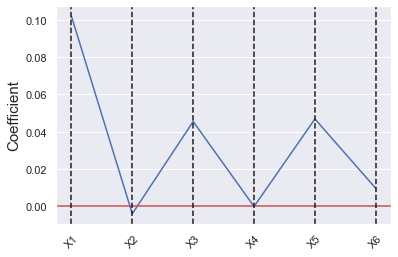

In [19]:
from sklearn.linear_model import Lasso
names = df.columns[1:]

lasso = Lasso(alpha = 0.01)
lasso_coef = lasso.fit(X_train,y_train).coef_

plt.plot(range(len(names)), lasso_coef);
plt.axhline(y=0, color='r', linestyle='-')

for xc in range(len(names)):
    plt.axvline(x=xc, color='k', linestyle='--')

plt.xticks(range(len(names)), names, rotation = 45)
plt.ylabel('Coefficient');

#X1, X3, X5, X6 have higher importance compared to X2 and X4

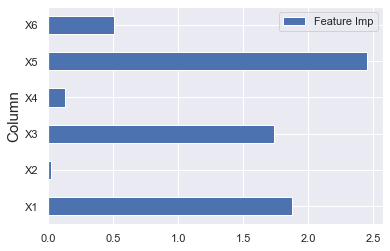

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sel = SelectKBest(chi2, k = 3)
sel.fit_transform(X_train,y_train)

fi_df = pd.DataFrame({'Column':df.columns[1:], 'Feature Imp':sel.scores_})
fi_df.plot(x = 'Column', y ='Feature Imp', kind = 'barh');

#Again, X1, X3, X5, X6 have higher importance compared to X2 and X4

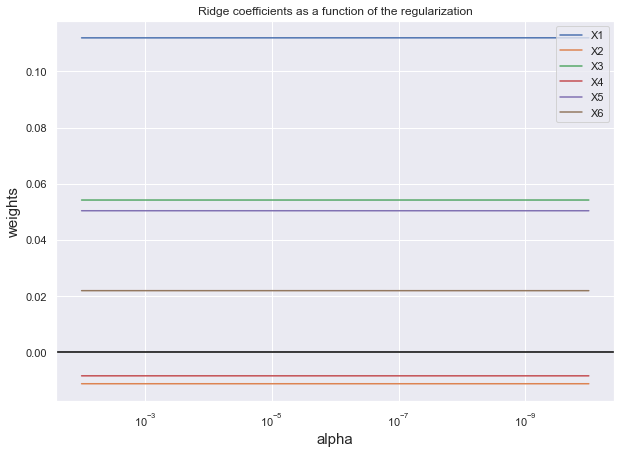

In [21]:
#Using regularization traceplots

from sklearn import linear_model

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
label = df.columns[1:]

plt.figure(figsize = (10,7))
ax = plt.gca()
ax.plot(alphas, coefs);
plt.axhline(y=0, color='black', linestyle='-')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(label);

#X2 and X4 are have negative weights compared to the rest. 

From the above three feature selection techniques, X1, X3, X5 and X6 are the chosen features.

In [22]:
#Choosing the right features

X_train = X_train[:,[0,2,4,5]]
X_test = X_test[:,[0,2,4,5]]

In [25]:
#Cross-Validation using classic classification models.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    LogisticRegression(random_state = 0),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB()
]

model_names = ('Logistic', 'Linear_SVC', 'Kernal_SVC', 'KNN', 'Naive_Bayes')

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=10, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(models, model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train_scaled,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
    highlight_max(color = 'green', axis = 0)

Logistic

1 of kfold 10
Accuracy: 72.72727272727273 %
2 of kfold 10
Accuracy: 54.54545454545454 %
3 of kfold 10
Accuracy: 54.54545454545454 %
4 of kfold 10
Accuracy: 45.45454545454545 %
5 of kfold 10
Accuracy: 81.81818181818183 %
6 of kfold 10
Accuracy: 40.0 %
7 of kfold 10
Accuracy: 60.0 %
8 of kfold 10
Accuracy: 50.0 %
9 of kfold 10
Accuracy: 70.0 %
10 of kfold 10
Accuracy: 10.0 %

Mean Accuracy of Logistic: 53.909 %

Linear_SVC

1 of kfold 10
Accuracy: 81.81818181818183 %
2 of kfold 10
Accuracy: 63.63636363636363 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of kfold 10
Accuracy: 36.36363636363637 %
5 of kfold 10
Accuracy: 63.63636363636363 %
6 of kfold 10
Accuracy: 40.0 %
7 of kfold 10
Accuracy: 70.0 %
8 of kfold 10
Accuracy: 50.0 %
9 of kfold 10
Accuracy: 70.0 %
10 of kfold 10
Accuracy: 10.0 %

Mean Accuracy of Linear_SVC: 54.909 %

Kernal_SVC

1 of kfold 10
Accuracy: 81.81818181818183 %
2 of kfold 10
Accuracy: 54.54545454545454 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of

,Models,Accuracy %,Accuracy STD%
3,KNN,65.273000,19.073000
2,Kernal_SVC,62.273000,21.747000
1,Linear_SVC,54.909000,20.038000
4,Naive_Bayes,54.818000,18.865000
0,Logistic,53.909000,19.074000


In [26]:
#Using Ensemble Models
#For these models, standardization and ordinal encoding are not needed.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree_model_names = ['Decision_tree', 'Random_forest', 'XGBOOST', 'CATBOOST', 'LightGB', 'AdaBOOST', 
                    'Gradient_Boosting_Classifier']

tree_models = [
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0), 
    XGBClassifier(use_label_encoder=False, eval_metric = 'error'), 
    CatBoostClassifier(verbose = False), 
    LGBMClassifier(), 
    AdaBoostClassifier(), 
    GradientBoostingClassifier()
]

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=10, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(tree_models,tree_model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':tree_model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
highlight_max(color = 'green', axis = 0)

Decision_tree

1 of kfold 10
Accuracy: 63.63636363636363 %
2 of kfold 10
Accuracy: 45.45454545454545 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of kfold 10
Accuracy: 72.72727272727273 %
5 of kfold 10
Accuracy: 72.72727272727273 %
6 of kfold 10
Accuracy: 70.0 %
7 of kfold 10
Accuracy: 50.0 %
8 of kfold 10
Accuracy: 40.0 %
9 of kfold 10
Accuracy: 60.0 %
10 of kfold 10
Accuracy: 30.0 %

Mean Accuracy of Decision_tree: 56.818 %

Random_forest

1 of kfold 10
Accuracy: 72.72727272727273 %
2 of kfold 10
Accuracy: 54.54545454545454 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of kfold 10
Accuracy: 81.81818181818183 %
5 of kfold 10
Accuracy: 90.9090909090909 %
6 of kfold 10
Accuracy: 70.0 %
7 of kfold 10
Accuracy: 70.0 %
8 of kfold 10
Accuracy: 50.0 %
9 of kfold 10
Accuracy: 60.0 %
10 of kfold 10
Accuracy: 20.0 %

Mean Accuracy of Random_forest: 63.364 %

XGBOOST

1 of kfold 10
Accuracy: 63.63636363636363 %
2 of kfold 10
Accuracy: 54.54545454545454 %
3 of kfold 10
Accuracy: 54.545454545

,Models,Accuracy %,Accuracy STD%
1,Random_forest,63.364000,18.502000
4,LightGB,62.182000,23.049000
3,CATBOOST,61.455000,18.966000
6,Gradient_Boosting_Classifier,58.818000,16.773000
2,XGBOOST,57.818000,15.327000
0,Decision_tree,56.818000,14.003000
5,AdaBOOST,51.909000,15.144000


KNN and Random Forest are the algorithms chosen.

In [31]:
#Grid-Searching for Tuning KNN

from sklearn.model_selection import GridSearchCV

params = [{'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': np.arange(5,20,5),
           'n_neighbors': np.arange(1,11,1), 'p': [1,2], 'weights': ['uniform', 'distance']}]

skf = KFold(n_splits=5, random_state=157, shuffle = True)

grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors


grid_tune = 1

while grid_tune <=5:
    grid_search.fit(X_train_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'grid_tune: {grid_tune}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    grid_tune +=1

grid_tune: 1
Best Accuracy: 65.71428571428571 %
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

grid_tune: 2
Best Accuracy: 65.71428571428571 %
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

grid_tune: 3
Best Accuracy: 65.71428571428571 %
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

grid_tune: 4
Best Accuracy: 65.71428571428571 %
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

grid_tune: 5
Best Accuracy: 65.71428571428571 %
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}



In [34]:
#Using Kfold cross validation for fitting on the training set and for predicting the test set.

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=5, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=5, p=2, 
                                      weights='uniform')
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

KNN_y_pred = classifier.predict(X_test_scaled)
KNN_y_probs = classifier.predict_proba(X_test_scaled)[:,1]

print()
print(metrics.confusion_matrix(y_test,KNN_y_pred)) 
print() 
print(f'KNN Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, KNN_y_pred)*100,3)} %')
print()
print(f'KNN ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, KNN_y_probs)*100,3)} %')
print()
print(metrics.classification_report(y_test, KNN_y_pred))

#KNN algorithms shows an accuracy of 76.19% on the test set.
#In terms of other classification metrics, KNN is doing a good job, especially with low false negatives

1 of kfold 5
Accuracy: 57.14285714285714 %
2 of kfold 5
Accuracy: 66.66666666666666 %
3 of kfold 5
Accuracy: 66.66666666666666 %
4 of kfold 5
Accuracy: 71.42857142857143 %
5 of kfold 5
Accuracy: 47.61904761904761 %

Mean Cross-Val Accuracy: 61.905 %

[[7 3]
 [4 7]]

KNN Accuracy Accuracy on TEST set: 66.667 %

KNN ROC AUC Score: 65.909 %

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.70      0.64      0.67        11

    accuracy                           0.67        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.67      0.67      0.67        21



In [35]:
#Tuning Random FOrest First using randomsearch CV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'n_estimators': np.arange(100,1100,100), 'criterion': ['gini', 'entropy'], 
          'max_depth': np.arange(1,11,1), 'min_samples_split': [2,3], 
          'min_samples_leaf': [1,2], 'max_features': ['auto', 'sqrt', 'log2'], 
          'ccp_alpha': [0.0, 0.015,0.035]}]

skf = KFold(n_splits=10, random_state=157, shuffle = True)

grid_search = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                           param_distributions = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

tuning = 1

while tuning <=5:
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning += 1

tuning: 1
Best Accuracy: 60.36363636363637 %
Best Parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'ccp_alpha': 0.0}

tuning: 2
Best Accuracy: 65.27272727272727 %
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy', 'ccp_alpha': 0.0}

tuning: 3
Best Accuracy: 61.272727272727266 %
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'entropy', 'ccp_alpha': 0.015}

tuning: 4
Best Accuracy: 62.36363636363635 %
Best Parameters: {'n_estimators': 900, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}

tuning: 5
Best Accuracy: 61.63636363636363 %
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_featur

tuning: 3

**Best Accuracy: 66.66666666666666 %**

**Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini', 'ccp_alpha': 0.0}**

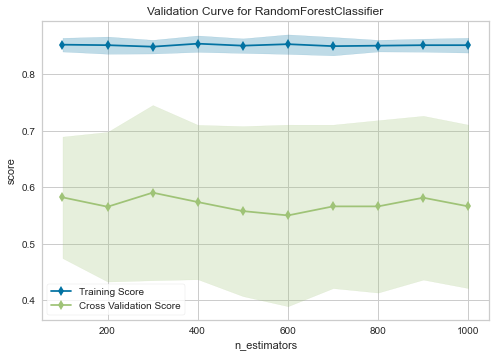

In [49]:
from yellowbrick.model_selection import ValidationCurve

rf = RandomForestClassifier(min_samples_leaf=2)

skf = KFold(n_splits=10, random_state=157, shuffle = True)

# Creating a visualizer object
viz = ValidationCurve(rf, param_name="n_estimators", n_jobs=-1,
                      param_range=np.arange(100,1100,100), cv=skf, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X, y)
viz.show();

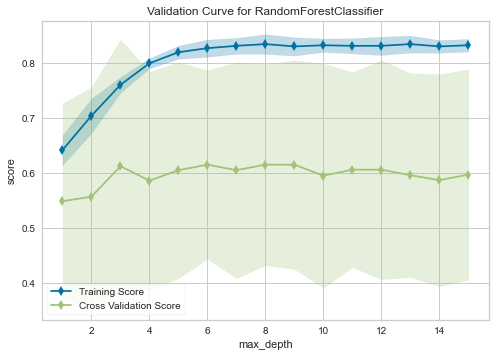

In [50]:
# Creating a visualizer object

rf = RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

viz = ValidationCurve(rf, param_name="max_depth", n_jobs=-1,
                      param_range=np.arange(1, 16), cv=skf, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show();

In [39]:
#Narrowing Random Forest hyparameters using Grid Search

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'n_estimators': [10,50,100], 'criterion': ['gini', 'entropy'], 
          'max_depth': [6]}]

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors


grid_tune = 1

while grid_tune <=5:
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'grid_tune: {grid_tune}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    grid_tune+=1

grid_tune: 1
Best Accuracy: 65.0 %
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10}

grid_tune: 2
Best Accuracy: 61.81818181818181 %
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

grid_tune: 3
Best Accuracy: 61.9090909090909 %
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

grid_tune: 4
Best Accuracy: 62.0 %
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}

grid_tune: 5
Best Accuracy: 61.00000000000001 %
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}



grid_tune: 2

Best Accuracy: 72.38095238095237 %

Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'n_estimators': 10}

In [40]:
#RF

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = RandomForestClassifier(criterion = 'entropy', max_depth= 13, n_estimators= 10, 
                                       min_samples_leaf=2)
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

RF_y_pred = classifier.predict(X_test)
RF_y_probs = classifier.predict_proba(X_test)[:,1]

print()
print(metrics.confusion_matrix(y_test,RF_y_pred)) 
print() 
print(f'RF Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, RF_y_pred)*100,3)} %')
print()
print(f'RF ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, RF_y_probs)*100,3)} %')
print()
print(metrics.classification_report(y_test, RF_y_pred))

1 of kfold 10
Accuracy: 72.72727272727273 %
2 of kfold 10
Accuracy: 63.63636363636363 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of kfold 10
Accuracy: 90.9090909090909 %
5 of kfold 10
Accuracy: 63.63636363636363 %
6 of kfold 10
Accuracy: 60.0 %
7 of kfold 10
Accuracy: 70.0 %
8 of kfold 10
Accuracy: 40.0 %
9 of kfold 10
Accuracy: 70.0 %
10 of kfold 10
Accuracy: 30.0 %

Mean Cross-Val Accuracy: 62.455 %

[[7 3]
 [3 8]]

RF Accuracy on TEST set: 71.429 %

RF ROC AUC Score: 72.273 %

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.73      0.73      0.73        11

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21



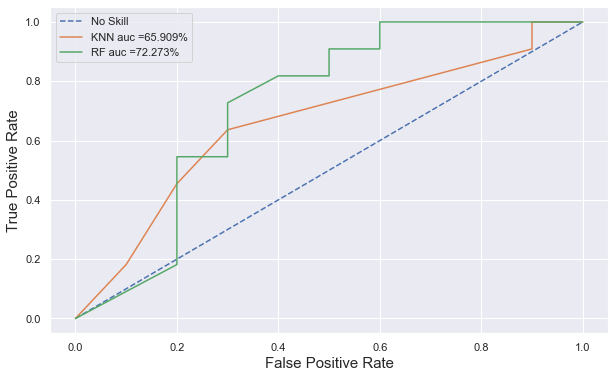

In [41]:
#Plotting ROC curve.

#No skill
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)

#KNN
KNN_fpr, KNN_tpr, _ = metrics.roc_curve(y_test, KNN_y_probs)

#RF
RF_fpr, RF_tpr, _ = metrics.roc_curve(y_test, RF_y_probs)

plt.figure(figsize = (10,6))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.plot(KNN_fpr, KNN_tpr, 
         label = "KNN auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       KNN_y_probs)*100,3)) + "%")

plt.plot(RF_fpr, RF_tpr, 
         label = "RF auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       RF_y_probs)*100,3)) + "%")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

Overall, tuned KNN algorithm performed well on the test set compared to CATBOOST. KNN has a higher AUC score of 72.2% compared to CATBOOST AUC score of 69.5%.

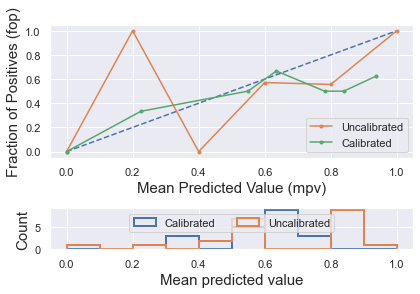

In [42]:
#Calibrating KNN

from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

#Uncalibrated model
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=5, p=2, 
                                      weights='uniform')
model.fit(X_train_scaled, y_train)

uc_probs = model.predict_proba(X_test_scaled)[:, 1]
uc_fop, uc_mpv = calibration_curve(y_test, uc_probs, n_bins=10, normalize=True)

#Calibrating Model
calibrated_KNN = CalibratedClassifierCV(model, method='sigmoid', cv=10)
calibrated_KNN.fit(X_train_scaled, y_train)
# predict probabilities
c_probs = calibrated_KNN.predict_proba(X_test_scaled)[:, 1]
# reliability diagram
c_fop, c_mpv = calibration_curve(y_test, c_probs, n_bins=10, normalize=True)


# plot perfectly calibrated

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], linestyle='--');

# plot un calibrated model reliability 
ax1.plot(uc_mpv, uc_fop, marker='.', label = 'Uncalibrated');

# plot calibrated reliability
ax1.plot(c_mpv, c_fop, marker='.', label = 'Calibrated');

ax1.set_ylabel('Fraction of Positives (fop)')
ax1.set_xlabel('Mean Predicted Value (mpv)')
ax1.legend();

ax2.hist(c_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Calibrated')
ax2.hist(uc_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Uncalibrated')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

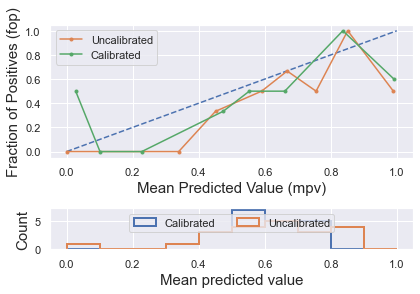

In [46]:
#Calibrating RF

from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

#Uncalibrated model
model = RandomForestClassifier(criterion = 'entropy', max_depth= 13, n_estimators= 10, 
                                       min_samples_leaf=2)
model.fit(X_train, y_train)

uc_probs = model.predict_proba(X_test)[:, 1]
uc_fop, uc_mpv = calibration_curve(y_test, uc_probs, n_bins=10, normalize=True)

#Calibrating Model
calibrated_RF = CalibratedClassifierCV(model, method='sigmoid', cv=10)
calibrated_RF.fit(X_train, y_train)
# predict probabilities
c_probs = calibrated_RF.predict_proba(X_test)[:, 1]
# reliability diagram
c_fop, c_mpv = calibration_curve(y_test, c_probs, n_bins=10, normalize=True)


# plot perfectly calibrated

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], linestyle='--');

# plot un calibrated model reliability 
ax1.plot(uc_mpv, uc_fop, marker='.', label = 'Uncalibrated');

# plot calibrated reliability
ax1.plot(c_mpv, c_fop, marker='.', label = 'Calibrated');

ax1.set_ylabel('Fraction of Positives (fop)')
ax1.set_xlabel('Mean Predicted Value (mpv)')
ax1.legend();

ax2.hist(c_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Calibrated')
ax2.hist(uc_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Uncalibrated')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [47]:
#Using Calibrated KNN model

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = calibrated_KNN
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CAL_KNN_y_pred = classifier.predict(X_test_scaled)
CAL_KNN_y_probs = classifier.predict_proba(X_test_scaled)[:,1]

print()
print(metrics.confusion_matrix(y_test,CAL_KNN_y_pred)) 
print() 
print(f'CAL_KNN Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CAL_KNN_y_pred)*100,3)} %')
print()
print(f'CAL_KNN ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, CAL_KNN_y_probs)*100,3)} %')
print()
print(metrics.classification_report(y_test, CAL_KNN_y_pred))

1 of kfold 10
Accuracy: 63.63636363636363 %
2 of kfold 10
Accuracy: 54.54545454545454 %
3 of kfold 10
Accuracy: 63.63636363636363 %
4 of kfold 10
Accuracy: 81.81818181818183 %
5 of kfold 10
Accuracy: 90.9090909090909 %
6 of kfold 10
Accuracy: 70.0 %
7 of kfold 10
Accuracy: 70.0 %
8 of kfold 10
Accuracy: 80.0 %
9 of kfold 10
Accuracy: 60.0 %
10 of kfold 10
Accuracy: 20.0 %

Mean Cross-Val Accuracy: 65.455 %

[[6 4]
 [2 9]]

CAL_KNN Accuracy Accuracy on TEST set: 71.429 %

CAL_KNN ROC AUC Score: 73.636 %

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.69      0.82      0.75        11

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21



In [45]:
#Using Calibrated RF model

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = KFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = calibrated_RF
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CAL_RF_y_pred = classifier.predict(X_test)
CAL_RF_y_probs = classifier.predict_proba(X_test)[:,1]

print()
print(metrics.confusion_matrix(y_test,CAL_RF_y_pred)) 
print() 
print(f'CAL_RF Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CAL_RF_y_pred)*100,3)} %')
print()
print(f'CAL_RF ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, CAL_RF_y_probs)*100,3)} %')
print()
print(metrics.classification_report(y_test, CAL_RF_y_pred))

1 of kfold 10
Accuracy: 81.81818181818183 %
2 of kfold 10
Accuracy: 36.36363636363637 %
3 of kfold 10
Accuracy: 54.54545454545454 %
4 of kfold 10
Accuracy: 72.72727272727273 %
5 of kfold 10
Accuracy: 72.72727272727273 %
6 of kfold 10
Accuracy: 70.0 %
7 of kfold 10
Accuracy: 70.0 %
8 of kfold 10
Accuracy: 50.0 %
9 of kfold 10
Accuracy: 60.0 %
10 of kfold 10
Accuracy: 30.0 %

Mean Cross-Val Accuracy: 59.818 %

[[5 5]
 [2 9]]

CAL_RF Accuracy Accuracy on TEST set: 66.667 %

CAL_RF ROC AUC Score: 75.0 %

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.64      0.82      0.72        11

    accuracy                           0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21



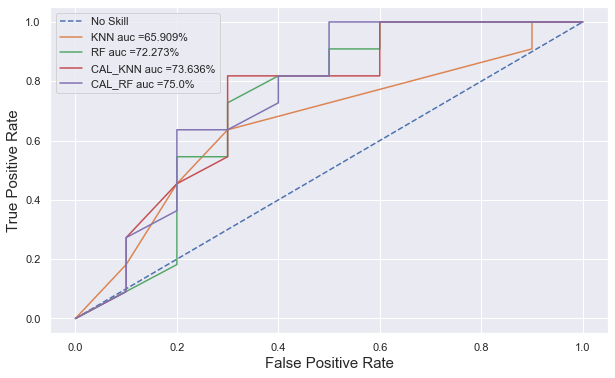

In [48]:
#Plotting ROC curve.

#No skill
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)

#KNN
KNN_fpr, KNN_tpr, _ = metrics.roc_curve(y_test, KNN_y_probs)

#RF
RF_fpr, RF_tpr, _ = metrics.roc_curve(y_test, RF_y_probs)

#CAL_KNN
CAL_KNN_fpr, CAL_KNN_tpr, _ = metrics.roc_curve(y_test, CAL_KNN_y_probs)

#CAL_RF
CAL_RF_fpr, CAL_RF_tpr, _ = metrics.roc_curve(y_test, CAL_RF_y_probs)


plt.figure(figsize = (10,6))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.plot(KNN_fpr, KNN_tpr, 
         label = "KNN auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       KNN_y_probs)*100,3)) + "%")

plt.plot(RF_fpr, RF_tpr, 
         label = "RF auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       RF_y_probs)*100,3)) + "%")

plt.plot(CAL_KNN_fpr, CAL_KNN_tpr, 
         label = "CAL_KNN auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       CAL_KNN_y_probs)*100,3)) + "%")

plt.plot(CAL_RF_fpr, CAL_RF_tpr, 
         label = "CAL_RF auc =" + str(np.round(metrics.roc_auc_score(y_test, 
                                                                       CAL_RF_y_probs)*100,3)) + "%")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

Overall, calibrated KNN scored a better accuracy of almost 71% with an acceptable AOC score of 73.6%.

One of the drawbacks is that the data used hwere was very less. Acquiring and training on more Data could help improve the model performance.
